# War fatalities in Russia in 2022 estimated via excess male mortality
## HIV deaths

In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
import pandas as pd

plt.style.use("mpl_style.txt")

In [2]:
df = pd.read_excel('../deaths-hiv/deaths-hiv.xlsx', skiprows=1, index_col=0)

male   = df.values[2:-1, 1::3]
female = df.values[2:-1, 2::3]

age   = np.arange(1, 101)
years = np.arange(2006, 2023)

df

,2006,Unnamed: 2,Unnamed: 3,2007,Unnamed: 5,Unnamed: 6,2008,Unnamed: 8,Unnamed: 9,2009,...,Unnamed: 42,2020,Unnamed: 44,Unnamed: 45,2021,Unnamed: 47,Unnamed: 48,2022,Unnamed: 50,Unnamed: 51
NaN,Мужчины и женщины,Мужчины,Женщины,Мужчины и женщины,Мужчины,Женщины,Мужчины и женщины,Мужчины,Женщины,Мужчины и женщины,...,Женщины,Мужчины и женщины,Мужчины,Женщины,Мужчины и женщины,Мужчины,Женщины,Мужчины и женщины,Мужчины,Женщины
Всего,2464,1877,587,3626,2762,864,4460,3404,1056,5640,...,6694,18499,12204,6295,16914,11118,5796,15804,10344,5460
1 год,4,3,1,0,0,0,4,4,0,2,...,1,2,1,1,2,1,1,0,0,0
2 года,1,0,1,1,1,0,0,0,0,1,...,1,0,0,0,2,1,1,3,3,0
3 года,0,0,0,5,2,3,3,1,2,1,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97 лет,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98 лет,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99 лет,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 и более,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


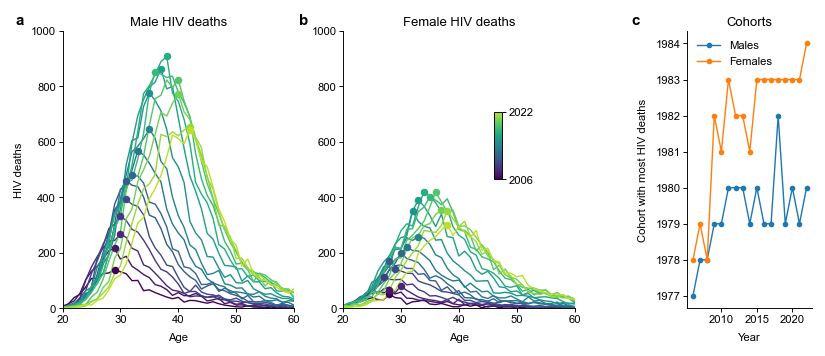

In [3]:
cm = plt.cm.viridis(np.linspace(0, .9, 2022 - 2006 + 1))

fig = plt.figure(figsize=(6, 2.5))

plt.subplot(131)
plt.gca().set_prop_cycle('color', list(cm))
plt.plot(age, male)

modes_male = np.zeros(years.size).astype(int)
for i, y in enumerate(years):
    mode = np.argmax(male[:, i])
    modes_male[i] = mode
    plt.plot(age[mode], male[mode, i], '.', markersize=6)

plt.xlim([20, 60])
plt.ylim([0, 1000])
plt.xlabel('Age')
plt.ylabel('HIV deaths')
plt.title('Male HIV deaths')

plt.subplot(132)
plt.gca().set_prop_cycle('color', list(cm))
plt.plot(age, female)

modes_female = np.zeros(years.size).astype(int)
for i, y in enumerate(years):
    mode = np.argmax(female[:, i])
    modes_female[i] = mode
    plt.plot(age[mode], female[mode, i], '.', markersize=6)
    
plt.xlim([20, 60])
plt.ylim([0, 1000])
plt.xlabel('Age')
plt.title('Female HIV deaths')

cb = plt.axes([.6, .5, .01, .2])
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('viridis_cropped', cm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=2006, vmax=2022))
plt.colorbar(sm, cax=cb, ticks=[2006, 2022])

plt.subplot(166)
plt.plot(years, years - age[modes_male],   '.-', label='Males')
plt.plot(years, years - age[modes_female], '.-', label='Females')
plt.legend()
plt.xticks([2010, 2015, 2020])
plt.xlabel('Year')
plt.ylabel('Cohort with most HIV deaths')
plt.title('Cohorts')

fig.text(.01, .96, 'a', fontsize=8, weight='bold')
fig.text(.36, .96, 'b', fontsize=8, weight='bold')
fig.text(.77, .96, 'c', fontsize=8, weight='bold')

plt.savefig('figures/hiv.png', dpi=200)
plt.savefig('figures/hiv.pdf')